In [166]:
import numpy as np
import matplotlib.pyplot as plt

In [167]:
def GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true):
    xold = x0
    k=0
    conditions = True
    
    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    errA_values = []  # Store ||grad_f(x_k)||_2 values
    errR_values = []  # Store ||xk-xtrue||_2 values
    
    while conditions:
        x = xold - alpha * grad_f(xold)

        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        errA_values.append(np.linalg.norm(grad_f(x), 2))
        errR_values.append(np.linalg.norm(x - x_true, 2))
        
        condition1 = np.linalg.norm(grad_f(x)) > tolf*np.linalg.norm(grad_f(x0))
        condition2 =  np.linalg.norm(x-xold) > tolx
        condition3 = k < kmax
        conditions = condition1 & condition2 & condition3
        k +=1
        xold = x
    return x_values, k, f_values, grad_values, errA_values, errR_values

def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-5:
            break
    return alpha
    
def GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true):
    xold = x0
    k = 0
    conditions = True

    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    errA_values = []  # Store ||grad_f(x_k)||_2 values
    errR_values = []  # Store ||xk-xtrue||_2 values
    
    while conditions:
        alpha = backtracking(f, grad_f, xold)
        x = xold - alpha * grad_f(xold)
        
        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        errA_values.append(np.linalg.norm(grad_f(x), 2))
        errR_values.append(np.linalg.norm(x - x_true, 2))
        
        condition1 = np.linalg.norm(grad_f(x), 2) > tolf * np.linalg.norm(grad_f(x0), 2)
        condition2 = np.linalg.norm(x-xold, 2) > tolx
        condition3 = k < kmax
        conditions = condition1 and condition2 and condition3
        k +=1
        xold = x
    return x_values, k, f_values, grad_values, errA_values, errR_values

In [168]:
def plt_contour(xk_vals, k, f_vals, grad_valks, err_vals, f, title):
    xv = np.linspace(-10, 10, 100).T
    yv = np.linspace(-10, 10, 100).T

    xx,yy = np.meshgrid(xv, yv)
    
    zz = f([xx, yy])

    xk_vals = np.array(xk_vals)
    
    plt.plot(xk_vals[:,0], xk_vals[:,1], '--go')

    plt.contour(xx, yy, zz)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid()

Alpha: 0.1, Iteration: 30, Solution: [2.99628618 0.99876206], Error: 0.0012379400392853901
Alpha: 0.01, Iteration: 101, Solution: [2.61009851 0.87003284], Error: 0.12996716477685807
Alpha: 0.001, Iteration: 101, Solution: [0.54921099 0.18307033], Error: 0.816929671079051


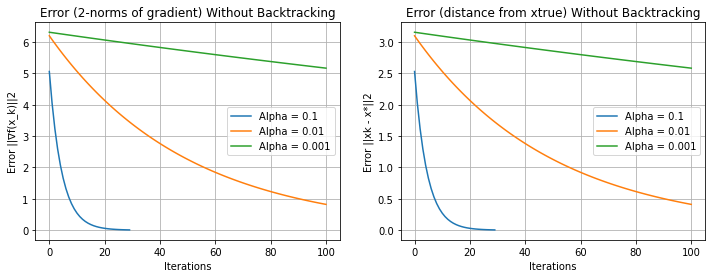


Iteration: 46, Solution: [2.99355101 0.99785034], Error: 0.0021496632850157016


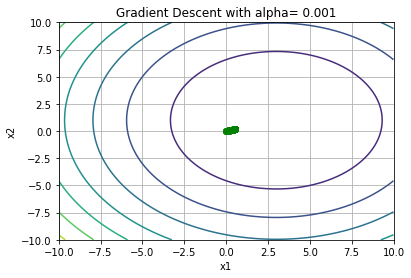

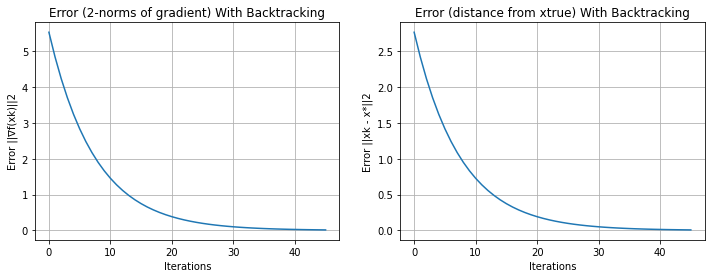

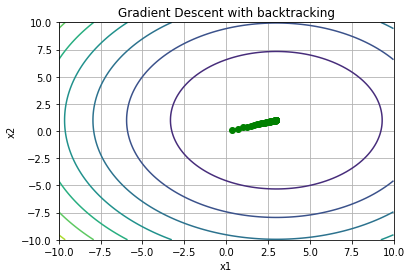

In [169]:
#FUNCTION 1
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (x1-3)**2 + (x2-1)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([2*(x1-3), 2*(x2-1)])

x0 = np.array([0, 0])
kmax = 100 #try 100 and 1000
tolf = tolx = 1e-3
x_true = np.array([3, 1])

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)

plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with alpha= " + str(alpha))

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with backtracking")

Alpha: 0.09, Iteration: 53, Solution: [1.00000731 1.9999459 ], Error: 2.4412143149849287e-05
Alpha: 0.01, Iteration: 101, Solution: [1.         1.74006567], Error: 0.11624616611358829
Alpha: 0.001, Iteration: 101, Solution: [0.87003284 0.36614066], Error: 0.7329921983046531


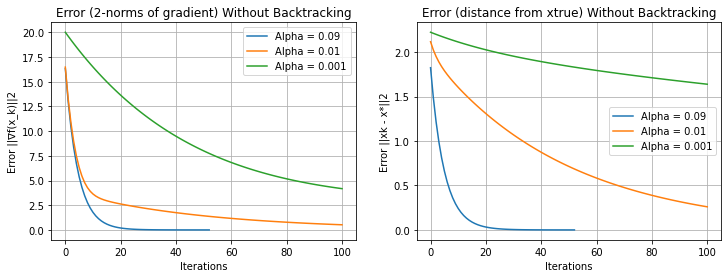


Iteration: 80, Solution: [1.         1.99990644], Error: 4.18422348494792e-05


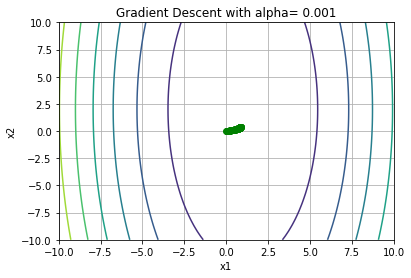

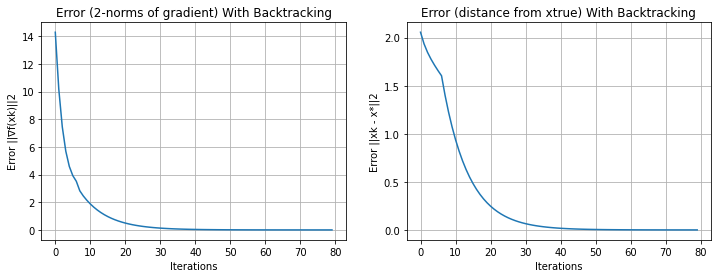

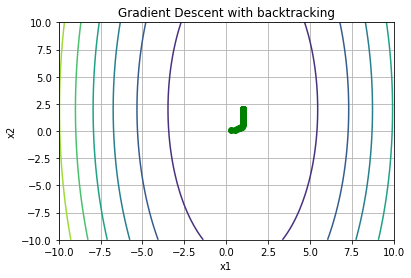

In [170]:
#FUNCTION 2 
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (10*(x1 - 1)**2 + (x2 - 2)**2)
def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([20*(x1 - 1), 2*(x2 - 2)])

x0 = np.array([0, 0])
kmax = 100 #try 100 and 1000
tolf = tolx = 1e-5
x_true = np.array([1, 2])

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.09, 0.01, 0.001]: # with alpha = 0.1 GD doesn't converge and stops in (2, 2) after max (1000) iteration. 
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)
plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with alpha= " + str(alpha))

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with backtracking")

n = 1
Alpha: 0.1, Iteration: 89, Solution: [0.99991536], Error: 8.46414978287191e-05
Alpha: 0.01, Iteration: 101, Solution: [0.63762798], Error: 0.3623720178604969
Alpha: 0.001, Iteration: 101, Solution: [0.09611265], Error: 0.9038873549665953


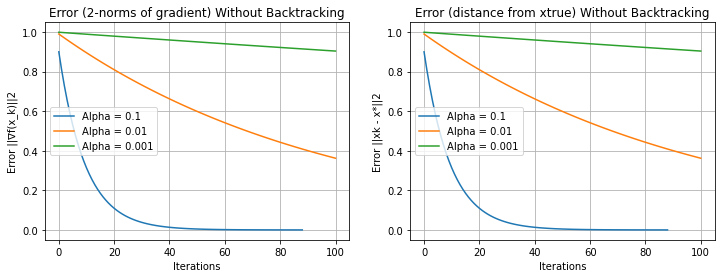


Iteration: 37, Solution: [0.99997616], Error: 2.3837831494288864e-05


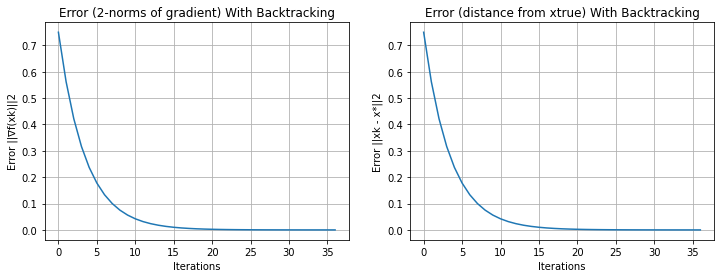

In [171]:
# FUNCTION 3

print("n = 1")
n = 1
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true

def f(x):
    return 1/2*(np.linalg.norm(A @ x - b, 2)**2)

def grad_f(x): #AT(Ax−b)
    residual = (A @ x) - b
    gradient = A.T @ residual
    return gradient

x0 = np.zeros(n)
kmax = 100 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)
plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

n = 5
Alpha: 0.1, Iteration: 101, Solution: [0.9919947  1.02701094 1.01220753 0.9914064  0.97267007], Error: 0.01878017197073288
Alpha: 0.01, Iteration: 101, Solution: [1.0818782  1.04385715 0.96810777 0.91430429 0.87599673], Error: 0.08045516866642592
Alpha: 0.001, Iteration: 101, Solution: [0.80243423 0.57900279 0.49635697 0.44917477 0.41937529], Error: 0.4712665239096292


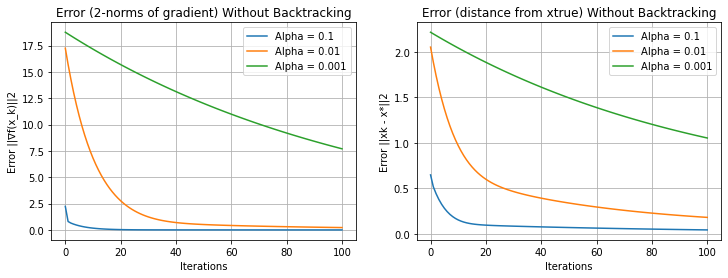


Iteration: 101, Solution: [0.99581423 1.01289291 1.00977362 0.99646586 0.98262623], Error: 0.010895958578089015


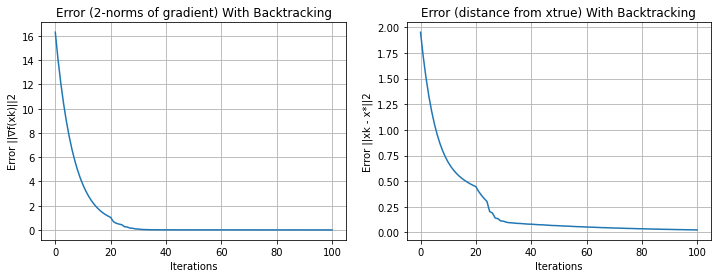

In [172]:
# FUNCTION 3

print("n = 5")
n = 5
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true

def f(x):
    return 1/2*(np.linalg.norm(A @ x - b, 2)**2)

def grad_f(x): #AT(Ax−b)
    residual = (A @ x) - b
    gradient = A.T @ residual
    return gradient

x0 = np.zeros(n)
kmax = 100 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)
plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

n=1
l = 0.8564078081710639
Alpha: 0.1, Iteration: 46, Solution: [0.5386322], Error: 0.46136780290284773
Alpha: 0.01, Iteration: 370, Solution: [0.53814964], Error: 0.46185036368831456
Alpha: 0.001, Iteration: 1001, Solution: [0.45481709], Error: 0.5451829084854777


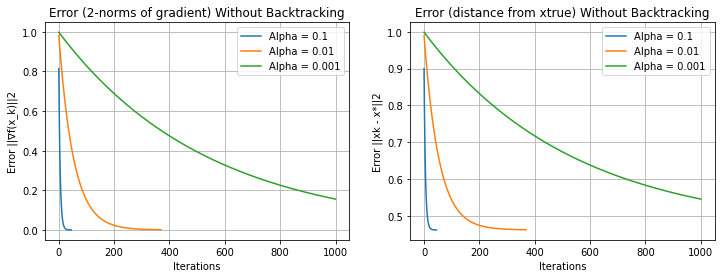


Iteration: 72, Solution: [0.53859976], Error: 0.4614002438128395


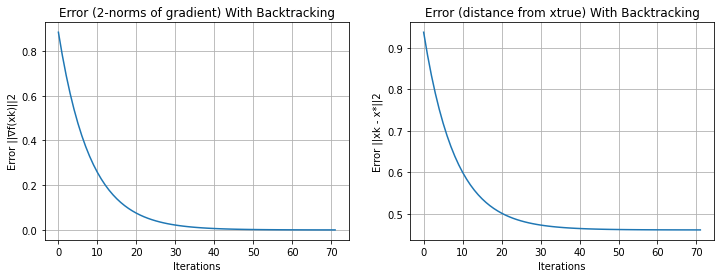

In [173]:
#FUNCTION 4
import random

print("n=1")
n = 1
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true
l = random.random() #fixed values between [0, 1] 
print(f"l = {l}")

def f(x):
    return 0.5*np.linalg.norm(A @ x - b, 2)**2 + l/2*np.linalg.norm(x, 2)**2

def grad_f(x): #AT(Ax-b)
    residual = (A @ x) - b
    gradient = A.T @ residual + l * x
    return gradient

x0 = np.zeros(n)
kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)

plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

n=5
l = 0.4917293340486717
Alpha: 0.1, Iteration: 68, Solution: [1.02303757 0.98407269 0.91859447 0.8713601  0.83741248], Error: 0.10039342121938898
Alpha: 0.01, Iteration: 415, Solution: [1.02284419 0.98506691 0.91872783 0.87095356 0.83665745], Error: 0.10068147128222844
Alpha: 0.001, Iteration: 1001, Solution: [1.06938711 0.97765799 0.89523161 0.83990997 0.80158593], Error: 0.12750459860386099


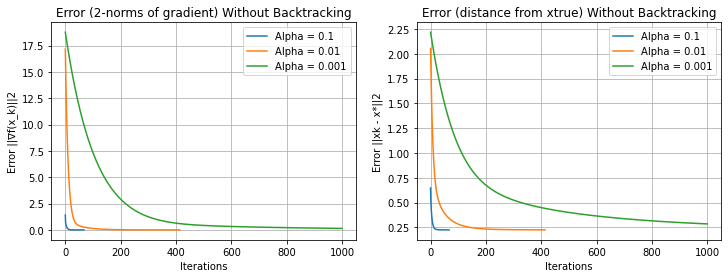


Iteration: 76, Solution: [1.02304051 0.98406138 0.9185926  0.87136416 0.83742039], Error: 0.10039061413878188


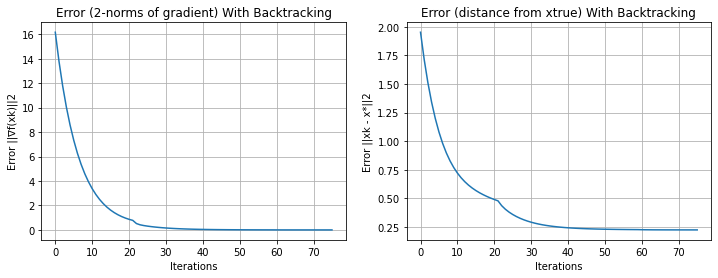

In [174]:
#FUNCTION 4
import random

print("n=5")
n = 5
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true
l = random.random() #fixed values between [0, 1] 
print(f"l = {l}")

def f(x):
    return 0.5*np.linalg.norm(A @ x - b, 2)**2 + l/2*np.linalg.norm(x, 2)**2

def grad_f(x): #AT(Ax-b)
    residual = (A @ x) - b
    gradient = A.T @ residual + l * x
    return gradient

x0 = np.zeros(n)
kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)

plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

In [175]:
def my_plot_2D(xk_vals, k, f_vals, grad_valks, err_vals, f, title):
    x_vals = np.linspace(-3, 3, 100)
    y_vals = []
    for x in x_vals:
        y_vals.append(f(x))
    plt.plot(x_vals, y_vals)
    plt.scatter(xk_vals, f_vals, c='green')
    plt.title(title)

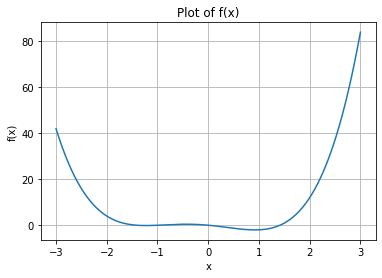

Alpha: 0.1, x0: -1, Iteration: 11, Solution: -1.2322368229753748
Alpha: 0.01, x0: -1, Iteration: 113, Solution: -1.2321078834970505
Alpha: 0.001, x0: -1, Iteration: 811, Solution: -1.2307850520802697


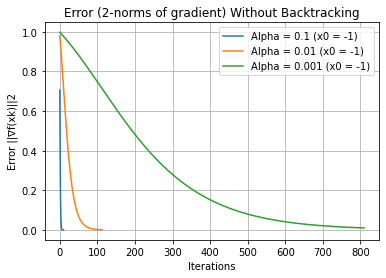

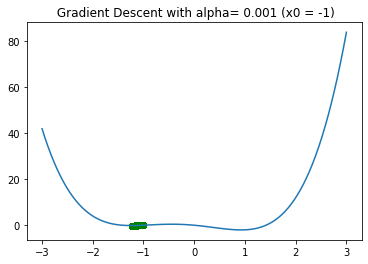


Iteration: 54, Solution: -1.2321590180202115


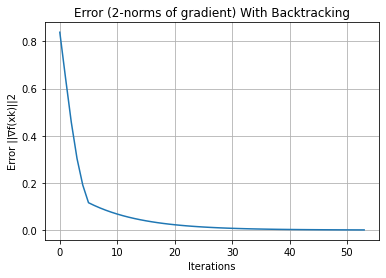

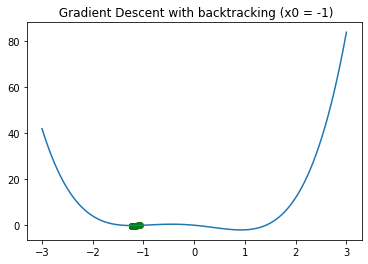

Alpha: 0.1, x0: 0, Iteration: 9, Solution: 0.9222263966908124
Alpha: 0.01, x0: 0, Iteration: 95, Solution: 0.9221561972760987
Alpha: 0.001, x0: 0, Iteration: 774, Solution: 0.9213887683969288


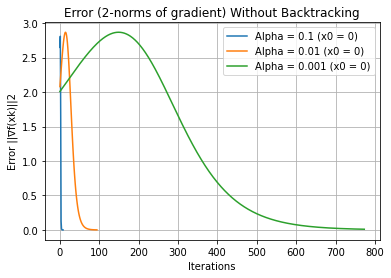

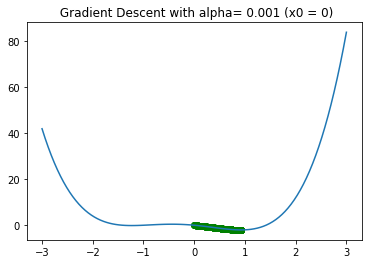


Iteration: 47, Solution: 0.9221833168070763


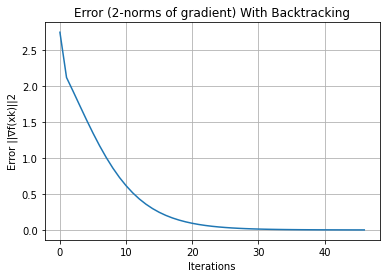

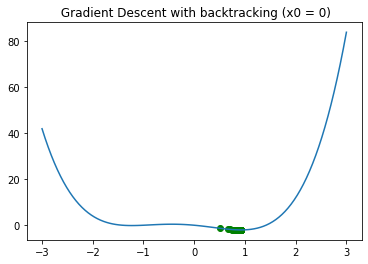

In [184]:
# FUNCTION 5

def GD(f, grad_f, x0, alpha, kmax, tolf, tolx):
    xold = x0
    k=0
    conditions = True

    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    err_values = []  # Store ||grad_f(x_k)||_2 values
    
    while conditions:
        x = xold - alpha * grad_f(xold)

        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        err_values.append(np.abs(grad_f(x)))
        
        condition1 = np.abs(grad_f(x)) > tolf*np.abs(grad_f(x0))
        condition2 =  np.abs(x-xold) > tolx
        condition3 = k < kmax
        conditions = condition1 & condition2 & condition3
        
        k +=1
        xold = x
    return x_values, k, f_values, grad_values, err_values
    
def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.abs(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-5:
            print("alpha too small")
            break
    return alpha

def GD_backtracking(f, grad_f, x0, kmax, tolf, tolx):
    xold = x0
    k = 0
    conditions = True
    
    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    err_values = []  # Store ||grad_f(x_k)||_2 values
    
    while conditions:
        alpha = backtracking(f, grad_f, xold)
        x = xold - alpha * grad_f(xold)

        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        err_values.append(np.abs(grad_f(x)))
        
        condition1 = np.abs(grad_f(x)) > tolf*np.abs(grad_f(x0))
        condition2 =  np.abs(x-xold) > tolx
        condition3 = k < kmax
        conditions = condition1 and condition2 and condition3
        
        k += 1
        xold = x
    return x_values, k, f_values, grad_values, err_values
    
def f(x):
    return x**4+x**3-2*x**2-2*x # Non convex function

x = np.linspace(-3, 3, 200)
y = f(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.grid(True)
plt.show()

def grad_f(x):
    return 4*(x**3)+3*(x**2)-4*x-2

kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

for x0 in [-1, 0]:
    #Without backtracking
    for alpha in [0.1, 0.01, 0.001]:
        x_sol_values, k, f_values, grad_values, err_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx)
        print(f"Alpha: {alpha}, x0: {x0}, Iteration: {k}, Solution: {x_sol_values[-1]}")
        plt.plot(range(k), err_values, label=f"Alpha = {alpha} (x0 = {x0})")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(xk)||2")
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.legend()
    plt.grid(True)
    
    plt.show()

    my_plot_2D(x_sol_values, k, f_values, grad_values, err_values, f, " Gradient Descent with alpha= " + str(alpha) + " (x0 = " + str(x0) + ")")
    plt.show()
    
    #With backtracking
    x_sol_values, k, f_values, grad_values, err_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx)
    print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}")
    
    plt.plot(range(k), err_values)
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(xk)||2")
    plt.title("Error (2-norms of gradient) with Backtracking")
    plt.grid(True)

    plt.show()

    my_plot_2D(x_sol_values, k, f_values, grad_values, err_values, f, " Gradient Descent with backtracking (x0 = " + str(x0) + ")")
    plt.show()